In [1]:
from os import listdir
from os.path import isfile, join
import re
import csv
import gensim
import numpy as np
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.wrappers import FastText
import logging
import os
import pandas as pd 
import sys
import sklearn.metrics
import sklearn
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphwhoics look nicer
import random
import math
import warnings
import utils
from utils import *
from utils2 import *
import scipy.stats
from dataDictionariesLexicons import *
from testData import *
from polesConstructs import *

random.seed(1)

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# warnings.filterwarnings('ignore')

sys.path.insert(0, '../') # necessary in order to import word2vecTraining where the epoch saver class, which is part of the model, is located

In [2]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
# modelFilePath = os.path.join(modelsPath, 'GoogleNews-vectors-negative300.bin')
# model2 = KeyedVectors.load_word2vec_format(modelFilePath,binary=True) 
modelFilePath = os.path.join(modelsPath, 'GoogleNews-vectors-negative300LowerCase.bin')
model1 = KeyedVectors.load(modelFilePath) 

In [3]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.6B.300d.txt.word2vec.bin')
model2 = KeyedVectors.load_word2vec_format(modelFilePath,binary=True) 

In [4]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.twitter.27B.200d.txt.word2vec.bin')
model3 = KeyedVectors.load(modelFilePath) 

In [5]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.42B.300d.txt.word2vec.bin')
model4 = KeyedVectors.load(modelFilePath) 

In [6]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.840B.300d.txt.word2vec.bin')
model5 = KeyedVectors.load(modelFilePath) 

In [7]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'fastext-common-crawl-300d-2M-subword.bin')
model6 = KeyedVectors.load(modelFilePath)

In [8]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'fastext-wiki-news-300d-1M-subword-Original.bin')
model7 = KeyedVectors.load(modelFilePath)

## Choose model

In [9]:
model = model1 # word2vec Google News
# model = model2
# model = model3
# model = model4
# model = model5
# model = model6
# model = model7

## Plot several axes

bipolar  GDP per capita
bipolar Car Brand prices
bipolar  Voting Behavior by Demographic Group
bipolar  Voting Behavior by Profession


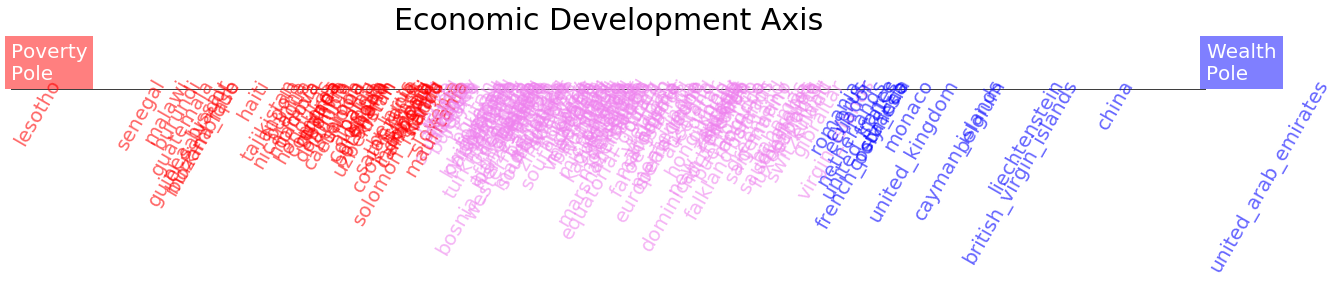

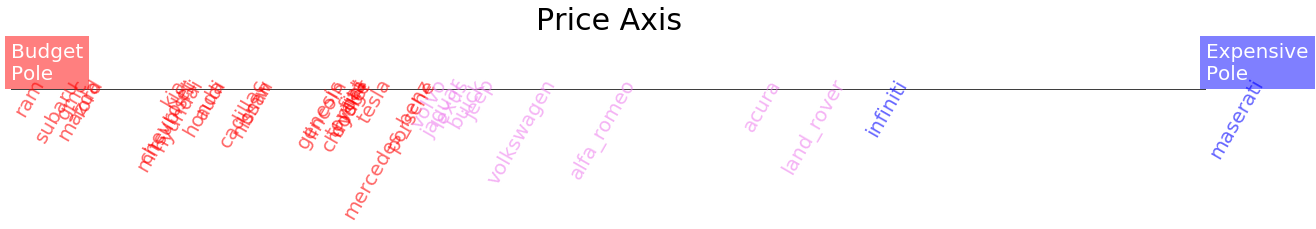

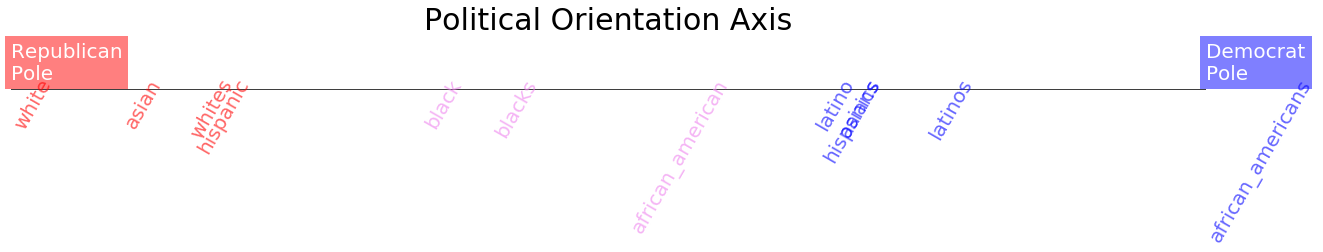

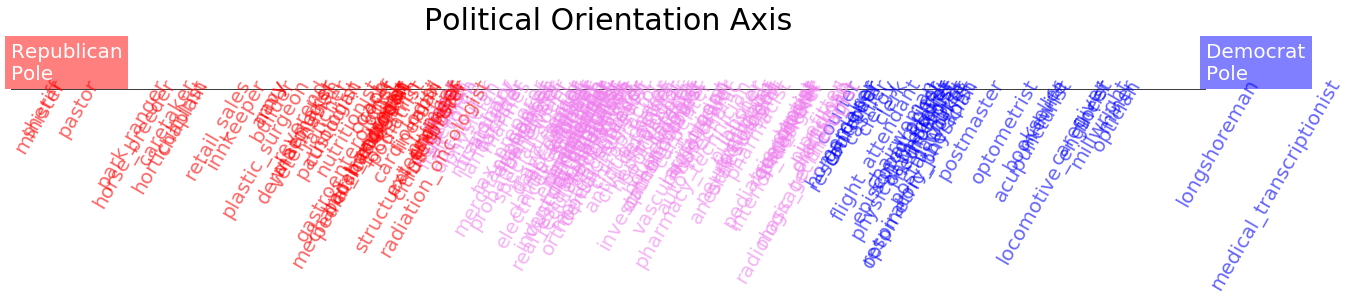

In [32]:
dataDictKeys = ['0-2','0-3','0-4','0-5']
poleNames = [('Poverty\nPole','Wealth\nPole'),('Budget\nPole','Expensive\nPole'),('Republican\nPole','Democrat\nPole'),('Republican\nPole','Democrat\nPole'),('Republican\nPole','Democrat\nPole')]
AxisNames = ['Economic Development Axis','Price Axis','Political Orientation Axis','Political Orientation Axis']
dataFrames = {}
# dataDictKey = '0-2'
for keyIndex, dataDictKey in enumerate(dataDictKeys):
    name = dataDict[dataDictKey]['name']
    constructPole1 = dataDict[dataDictKey]['constructPole1']
    constructPole2 = dataDict[dataDictKey]['constructPole2']
    RealDataTemp = dataDict[dataDictKey]['RealDataLexicons'][0]
    print(name)
    constructPole1,constructPole2 = constructsFilter(model,constructPole1,constructPole2,printFlag=False)# Filter out terms not in model vocabulary

    RealData = realDataFilter(model,RealDataTemp,0)#Filter out terms not in model vocabulary (Last parameter Flag prints out OOV words)
    Axis = dimensionN(model, constructPole1,constructPole2)  
    AxisName='Axis'
    try:
        dataFrame = makeDF(model, RealData.keys(),Axis,AxisName)
    except:
        pass
    dataFrame['RealValues']=RealData.values()
    dataFrame['AxisInRadians']=[math.acos(value) for value in dataFrame['Axis'].tolist()]# Transform cosine  similarities into angle radians (interval variable)
    dataFrame['Name']=dataFrame.index ###   index column into its own name column
    spearmanCorr,pearsonCorr=calculateCorrelations(dataFrame,printFlag=False)    
    dataFrames[dataDictKey]=dataFrame
    fig = plt.figure(figsize = (150,0.1))
    ax1 = fig.add_subplot(161)
    PlotDimensionH(ax1, dataFrame, AxisName,constructPole1,constructPole2,fontSize=20,pole1Name=poleNames[keyIndex][0],pole2Name=poleNames[keyIndex][1],title=AxisNames[keyIndex])    
    plt.savefig(f'../../paper/figures/extras/{dataDictKey}.png',dpi=300,bbox_inches='tight',pad_inches=0.5)

dataFrame1 = dataFrames['0-2']
dataFrame2 = dataFrames['0-3']
dataFrame3 = dataFrames['0-4']
dataFrame4 = dataFrames['0-5']

In [33]:
#Stitching all images together
import numpy as np
from PIL import Image
import PIL
imgs = [Image.open(f'../../paper/figures/extras/{x}.png') for x in dataDictKeys]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '../../paper/figures/extras/googleNewsAxesProjectionsDemo.png' )

In [29]:
len([w for w in percentageOccupationFemale if w in model1.wv.vocab])

26

## Plots multiple correlations

bipolar  Occupations
bipolar  GDP per capita
bipolar Car Brand prices
bipolar  Voting Behavior by Profession


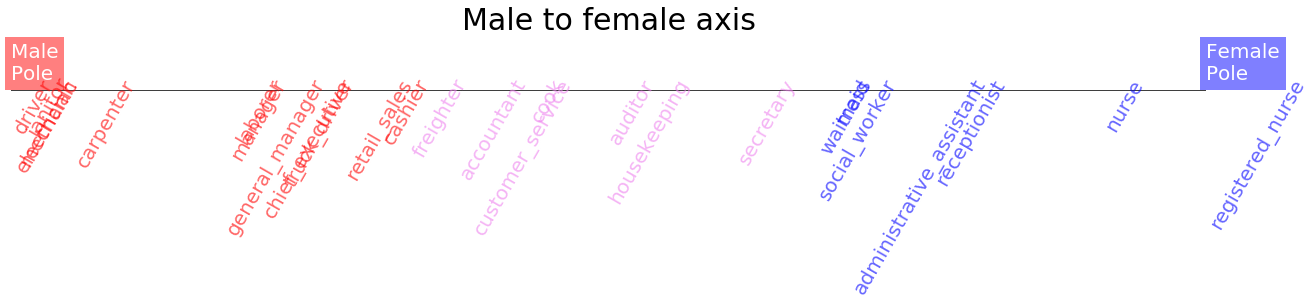

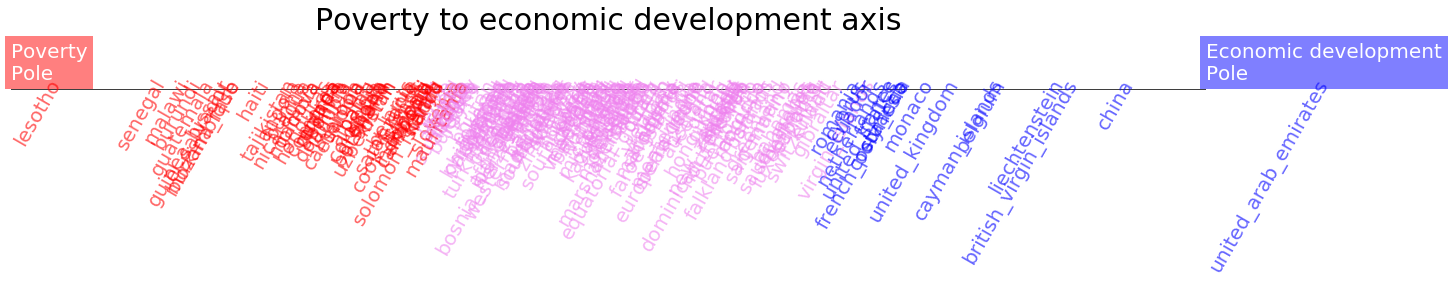

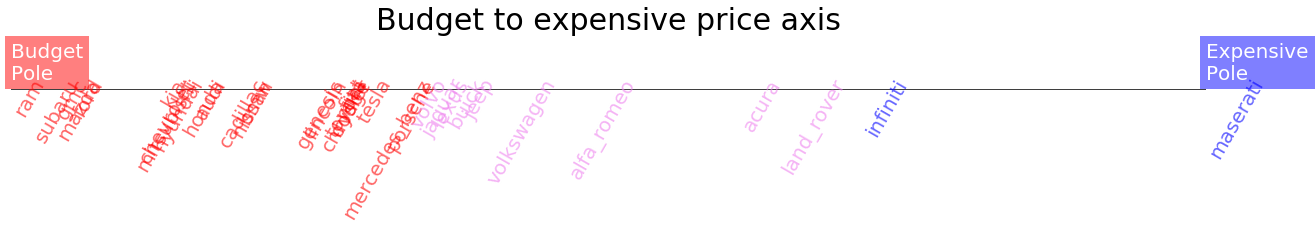

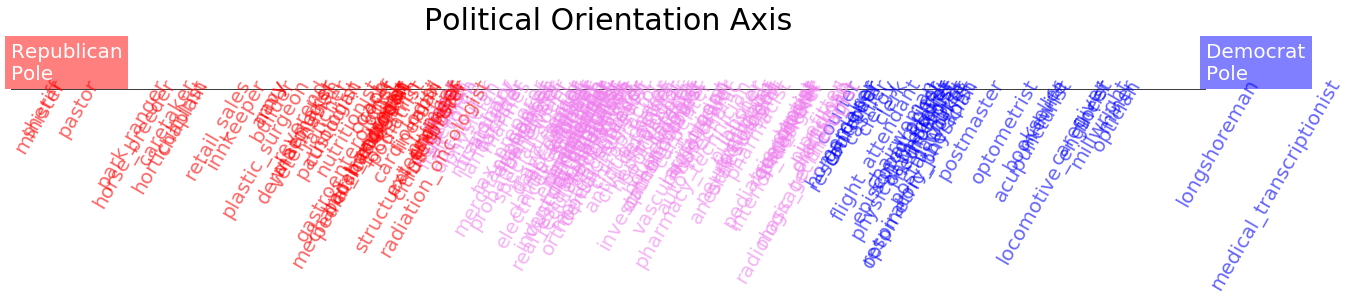

In [34]:
dataDictKeys = ['0-1','0-2','0-3','0-5']
poleNames = [('Male\nPole','Female\nPole'),('Poverty\nPole','Economic development\nPole'),('Budget\nPole','Expensive\nPole'),('Republican\nPole','Democrat\nPole'),('Republican\nPole','Democrat\nPole')]
AxisNames = ['Male to female axis','Poverty to economic development axis','Budget to expensive price axis','Political Orientation Axis','Conservatives to Liberals axis']
dataFrames = {}
# dataDictKey = '0-2'
for keyIndex, dataDictKey in enumerate(dataDictKeys):
    name = dataDict[dataDictKey]['name']
    constructPole1 = dataDict[dataDictKey]['constructPole1']
    constructPole2 = dataDict[dataDictKey]['constructPole2']
    RealDataTemp = dataDict[dataDictKey]['RealDataLexicons'][0]
    print(name)
    constructPole1,constructPole2 = constructsFilter(model,constructPole1,constructPole2,printFlag=False)# Filter out terms not in model vocabulary

    RealData = realDataFilter(model,RealDataTemp,0)#Filter out terms not in model vocabulary (Last parameter Flag prints out OOV words)
    Axis = dimensionN(model, constructPole1,constructPole2)  
    AxisName='Axis'
    try:
        dataFrame = makeDF(model, RealData.keys(),Axis,AxisName)
    except:
        pass
    dataFrame['RealValues']=RealData.values()
    dataFrame['AxisInRadians']=[math.acos(value) for value in dataFrame['Axis'].tolist()]# Transform cosine  similarities into angle radians (interval variable)
    dataFrame['Name']=dataFrame.index ###   index column into its own name column
    spearmanCorr,pearsonCorr=calculateCorrelations(dataFrame,printFlag=False)    
    dataFrames[dataDictKey]=dataFrame
    fig = plt.figure(figsize = (150,0.1))
    ax1 = fig.add_subplot(161)
    PlotDimensionH(ax1, dataFrame, AxisName,constructPole1,constructPole2,fontSize=20,pole1Name=poleNames[keyIndex][0],pole2Name=poleNames[keyIndex][1],title=AxisNames[keyIndex])    
    plt.savefig(f'../../paper/figures/{dataDictKey}.png',dpi=300,bbox_inches='tight',pad_inches=0.5)

dataFrame1 = dataFrames['0-1']
dataFrame2 = dataFrames['0-2']
dataFrame3 = dataFrames['0-3']
dataFrame4 = dataFrames['0-5']

## Switching into R

In [35]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [36]:
%%R 

#install.packages("car");install.packages("pastecs");install.packages("psych");
# install.packages("cowplot")

library(cowplot);library(car); library(ggplot2); library(pastecs); library(psych); library(gridExtra); library(MASS);library(Hmisc)

In [37]:
%%R -i dataFrame1 -i dataFrame2 -i dataFrame3 -i dataFrame4

Axis1 = dataFrame1$Axis
RealValues1 = dataFrame1$RealValues

Axis2 = dataFrame2$Axis
RealValues2 = dataFrame2$RealValues

Axis3 = dataFrame3$Axis
RealValues3 = dataFrame3$RealValues

Axis4 = dataFrame4$Axis
RealValues4 = dataFrame4$RealValues

## Correlations

In [38]:
%%R -o correlationPearson1 -o correlationSpearman1 -o correlationPvalue1 -o correlationTest1 -o correlationPearson2 -o correlationSpearman2 -o correlationPvalue2 -o correlationTest2  -o correlationPearson3 -o correlationSpearman3 -o correlationPvalue3 -o correlationTest3 -o correlationPearson4 -o correlationSpearman4 -o correlationPvalue4 -o correlationTest4 

# single correlation between a pair of variables
correlationPearson1 <- cor(Axis1,RealValues1,use="complete.obs",method="pearson")
correlationSpearman1 <- cor(Axis1,RealValues1,use="complete.obs",method="spearman")
correlationPvalue1 <- rcorr(Axis1,RealValues1,type="pearson")
# alternative = “less” and alternative = “greater”, alternative = "two.sided" respectively.
correlationTest1 <- cor.test(Axis1,RealValues1, alternative = "greater", method = "pearson", conf.level = 0.95)

correlationPearson2 <- cor(Axis2,RealValues2,use="complete.obs",method="pearson")
correlationSpearman2 <- cor(Axis2,RealValues2,use="complete.obs",method="spearman")
correlationPvalue2 <- rcorr(Axis2,RealValues2,type="pearson")
correlationTest2 <- cor.test(Axis2,RealValues2, alternative = "greater", method = "pearson", conf.level = 0.95)

correlationPearson3 <- cor(Axis3,RealValues3,use="complete.obs",method="pearson")
correlationSpearman3 <- cor(Axis3,RealValues3,use="complete.obs",method="spearman")
correlationPvalue3 <- rcorr(Axis3,RealValues3,type="pearson")
correlationTest3 <- cor.test(Axis3,RealValues3, alternative = "greater", method = "pearson", conf.level = 0.95)

correlationPearson4 <- cor(Axis4,RealValues4,use="complete.obs",method="pearson")
correlationSpearman4 <- cor(Axis4,RealValues4,use="complete.obs",method="spearman")
correlationPvalue4 <- rcorr(Axis4,RealValues4,type="pearson")
correlationTest4 <- cor.test(Axis4,RealValues4, alternative = "greater", method = "pearson", conf.level = 0.95)

In [39]:
print("Pearson correlation: ", correlationPearson1)
print("Spearman correlation: ",correlationSpearman1)
# print(correlationPvalue)
print(correlationTest4)

Pearson correlation:  [1] 0.8786596

Spearman correlation:  [1] 0.8920082



	Pearson's product-moment correlation



data:  Axis4 and RealValues4

t = 3.4717, df = 182, p-value = 0.000323

alternative hypothesis: true correlation is greater than 0

95 percent confidence interval:

 0.1315514 1.0000000

sample estimates:

      cor 

0.2492184 





## Plot

In [40]:
%%R

# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [41]:
import utils
decimals=2

correlationTestDictionary=dict(zip(correlationTest1.names, map(list,list(correlationTest1))))
p=pValueAdjustment(correlationTestDictionary['p.value'][0])
plotLabel1 = "r=" + str(truncate(correlationTestDictionary['estimate'][0],decimals)) + ", " + str(p)

correlationTestDictionary=dict(zip(correlationTest2.names, map(list,list(correlationTest2))))
p=pValueAdjustment(correlationTestDictionary['p.value'][0])
plotLabel2 = "r=" + str(truncate(correlationTestDictionary['estimate'][0],decimals)) + ", " + str(p)

correlationTestDictionary=dict(zip(correlationTest3.names, map(list,list(correlationTest3))))
p=pValueAdjustment(correlationTestDictionary['p.value'][0])
plotLabel3 = "r=" + str(truncate(correlationTestDictionary['estimate'][0],decimals)) + ", " + str(p)[:8]

correlationTestDictionary=dict(zip(correlationTest4.names, map(list,list(correlationTest4))))
p=pValueAdjustment(correlationTestDictionary['p.value'][0])
plotLabel4 = "r=" + str(truncate(correlationTestDictionary['estimate'][0],decimals)) + ", " + str(p)
plotLabel3

'r=0.45, p<0.01'

In [42]:
dataFrame1

,Axis,RealValues,AxisInRadians,Name
registered_nurse,0.281526,89.4,1.285413,registered_nurse
secretary,0.109823,94.5,1.460751,secretary
administrative_assistant,0.151905,94.5,1.418301,administrative_assistant
nurse,0.243661,89.4,1.324658,nurse
customer_service,0.013399,65.1,1.557397,customer_service
manager,-0.075202,34.3,1.646070,manager
retail_sales,-0.033453,49.4,1.604255,retail_sales
cashier,-0.019930,72.5,1.590727,cashier
accountant,0.008340,59.7,1.562456,accountant
auditor,0.062503,59.7,1.508253,auditor


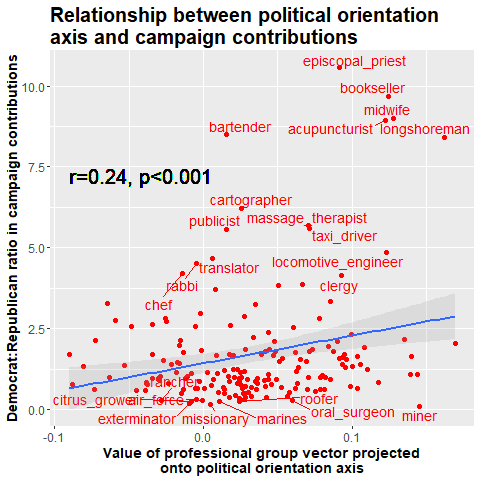

In [43]:
%%R -i plotLabel1 -i plotLabel2 -i plotLabel3 -i plotLabel4
#install.packages("ggrepel")
# install.packages("MASS")
library(ggrepel)
library(MASS)


margin(t = 500, r = 0, b = 0, l = 1000, unit = "pt")

gt4<-ggplot(data=dataFrame4) + 
geom_point(aes(x=Axis4, y=RealValues4),shape=16,color='red',size=2,show.legend=FALSE)+
# geom_text_repel(aes(label=Name,x=Axis4, y=RealValues4),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
geom_text_repel(data=subset(dataFrame4, RealValues > 4 | RealValues < 0.3),aes(label=Name,x=Axis, y=RealValues),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
geom_text(aes(label=plotLabel4,x=-0.09, y=7),family = "TT Arial",color='black',size=7,hjust=0, vjust=0) +
xlab("Value of professional group vector projected\nonto political orientation axis") +
ylab("Democrat:Republican ratio in campaign contributions")+
geom_smooth(aes(x=Axis4, y=RealValues4),method="lm",alpha=0.2)+ #method="rlm" for robustness against outliers (library MASS required)
theme(axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"),
     plot.title = element_text(size = 20, face = "bold")) +
ggtitle("Relationship between political orientation\naxis and campaign contributions")
#scale_x_continuous(expand = c(.1, .1))

gt4

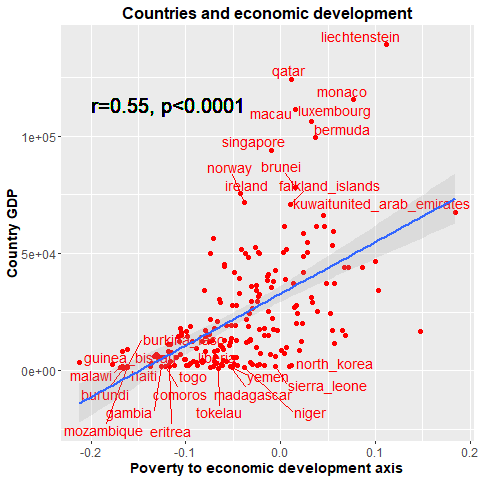

In [44]:
%%R -i plotLabel1 -i plotLabel2 -i plotLabel3 -i plotLabel4
#install.packages("ggrepel")
# install.packages("MASS")
library(ggrepel)
library(MASS)

margin(t = 500, r = 500, b = 100, l = 1000, unit = "pt")
gt1<-ggplot(data=dataFrame1) + 
geom_point(aes(x=Axis1, y=RealValues1),shape=16,color='red',size=2,show.legend=FALSE)+
geom_text_repel(aes(label=Name,x=Axis1, y=RealValues1),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
geom_text(aes(label=plotLabel1,x=-0.15, y=115),family = "TT Arial",color='black',size=7,hjust=0, vjust=0) +
xlab("Male to female axis") +
ylab("Percentage of workforce that is female")+
geom_smooth(aes(x=Axis, y=RealValues1),method="lm",alpha=0.2)+ #method="rlm" for robustness against outliers (library MASS required)
theme(axis.text=element_text(size=12),
     axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size = 16, face = "bold", hjust=0.5)) +
ggtitle("Gender and percentage\nof female representation in profession")

gt2<-ggplot(data=dataFrame2) + 
geom_point(aes(x=Axis2, y=RealValues2),shape=16,color='red',size=2,show.legend=FALSE)+
geom_text_repel(data=subset(dataFrame2,RealValues2 > 65000 | RealValues2 < 2000),aes(label=Name,x=Axis, y=RealValues),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
geom_text(aes(label=plotLabel2,x=-0.2, y=110000),family = "TT Arial",color='black',size=7,hjust=0, vjust=0) +
xlab("Poverty to economic development axis") +
ylab("Country GDP")+
geom_smooth(aes(x=Axis, y=RealValues2),method="lm",alpha=0.2)+ #method="rlm" for robustness against outliers (library MASS required)
theme(axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"),
     plot.title = element_text(size = 16, face = "bold", hjust=0.5)) +
ggtitle("Countries and economic development")

gt3<-ggplot(data=dataFrame3) + 
geom_point(aes(x=Axis3, y=RealValues3),shape=16,color='red',size=2,show.legend=FALSE)+
geom_text_repel(data=subset(dataFrame3, RealValues3 > 60000 | RealValues3 < 2000),aes(label=Name,x=Axis, y=RealValues),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
#geom_text(aes(label="r=0.8, p<0.01",x=0.15, y=80),family = "TT Arial",color='black',size=7,hjust=0, vjust=0) +
geom_text(aes(label=plotLabel3,x=0.1, y=10),family = "TT Arial",color='black',size=7,hjust=0, vjust=0) +
xlab("Budget to expensive price axis") +
ylab("Average price of car from brand")+
# ylim(0, 100) + xlim(-0.2,0.3) +
geom_smooth(aes(x=Axis3, y=RealValues3),method="lm",alpha=0.2)+ #method="rlm" for robustness against outliers (library MASS required)
ggtitle("Budget to expensive axis")+
theme(axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"),
     plot.title = element_text(size = 16, face = "bold", hjust=0.5)) +
ggtitle("Car manufacturer brands and prices")


gt4<-ggplot(data=dataFrame4) + 
geom_point(aes(x=Axis4, y=RealValues4),shape=16,color='red',size=2,show.legend=FALSE)+
# geom_text_repel(aes(label=Name,x=Axis4, y=RealValues4),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
geom_text_repel(data=subset(dataFrame4, RealValues > 4 | RealValues < 0.3),aes(label=Name,x=Axis, y=RealValues),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
geom_text(aes(label=plotLabel4,x=-0.09, y=7),family = "TT Arial",color='black',size=7,hjust=0, vjust=0) +
xlab("Conservatives to Liberals axis") +
ylab("Democrat:Republican ratio of campaign contributions")+
geom_smooth(aes(x=Axis4, y=RealValues4),method="lm",alpha=0.2)+ #method="rlm" for robustness against outliers (library MASS required)
theme(axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"),
     plot.title = element_text(size = 16, face = "bold", hjust=0.5)) +
ggtitle("Professions and campaign contributions")

gt2

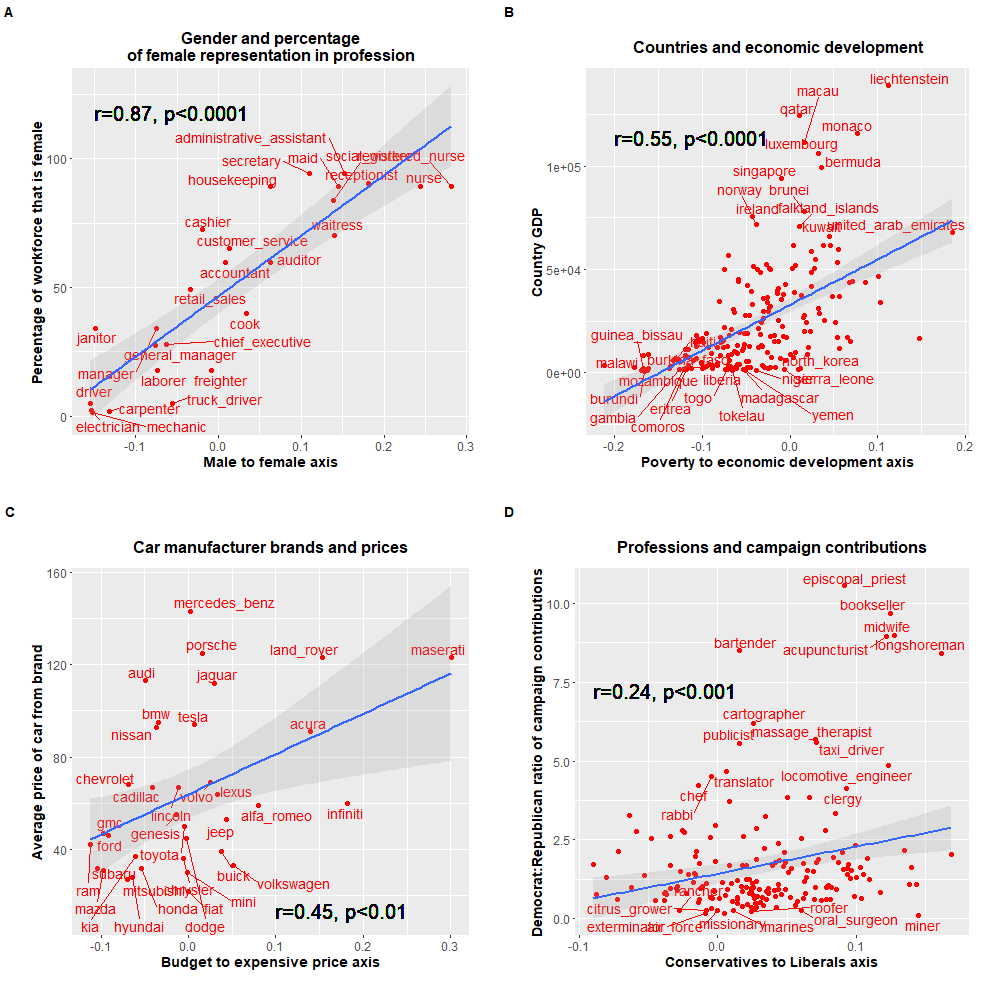

In [45]:
%%R -w 1000 -h 1000 -u px

theme_set(theme_gray())  # switch to default ggplot2 theme for good
plot_grid(gt1, gt2, gt3,gt4, align='h', labels=c('A', 'B',"C","D"), #hjust =0, vjust = 0,
         scale = c(0.9, 0.9, 0.9, 0.9))#Requires library cowplot

# multiplot(gt1, gt2, gt3, gt4,cols=2)
# ggsave("../../paper/figures/multipleCorrelations.png",dpi=300)

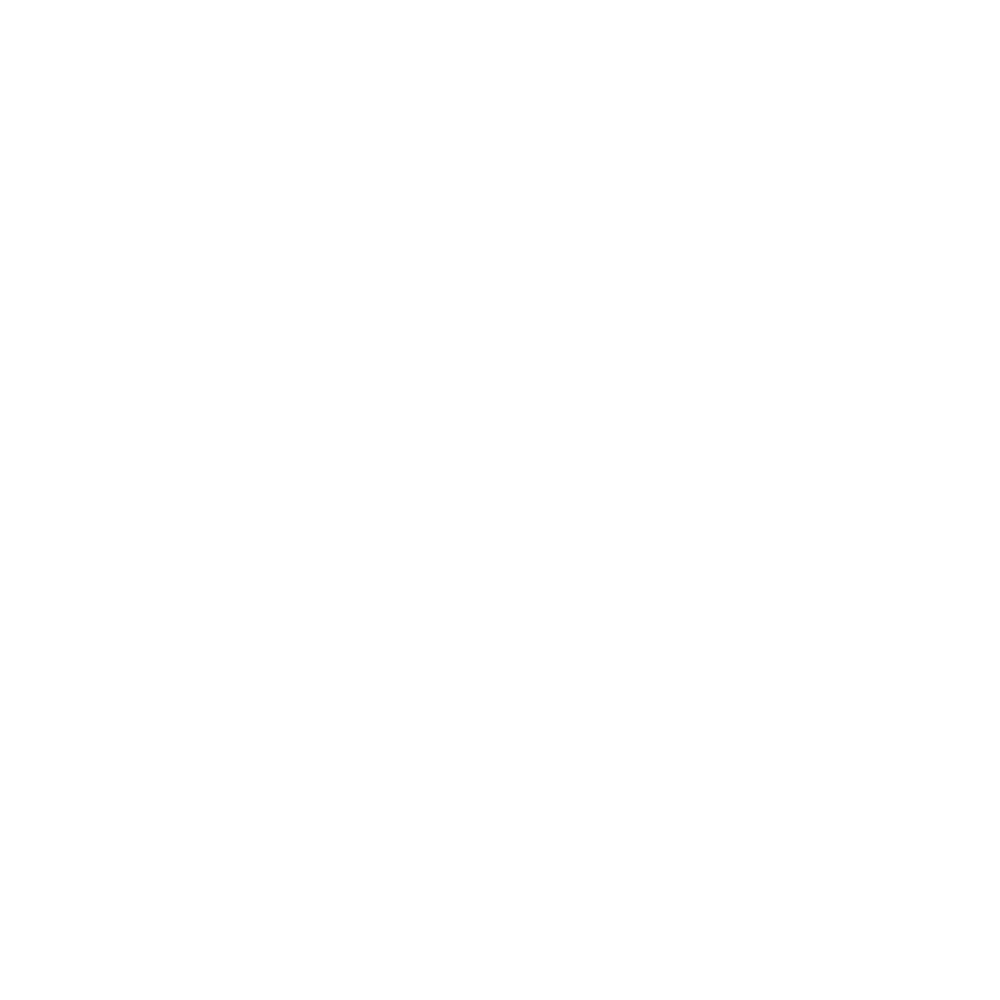

In [47]:
%%R -w 1000 -h 1000 -u px
ggsave("../../paper/figures/multipleCorrelations.png",dpi=300)